In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/sample_data/Position_Salaries.csv') 
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
#Seleccionamos solo los valores quitando la posición
X = data.iloc[:, 1:2].values#Elejimos la columna 'Level' la extraemos como una matriz y no como un arreglo
y = data.iloc[:, -1].values#Columna 'Salary' es la columna dependiente
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
#No dividiremos los datos en los dos conjuntos porque son muy pocos y los podemos utilizar todos

#Ajustar la regresión lineal con el dataset
from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression()
lin_regression.fit(X, y)

#Ajustar la regresión polinómica con el dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #Regresión polinómica de grado dos
X_poly = poly_reg.fit_transform(X) #Transformación polinómica

In [ ]:
print(X)
print(X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

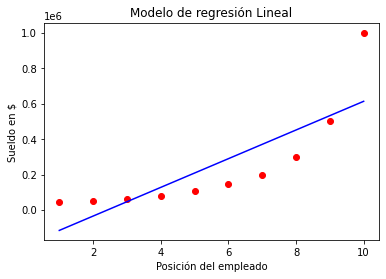

In [ ]:
#Visualización de los resultados del Modelo Lineal
plt.scatter(X, y, color = "red")
plt.plot(X, lin_regression.predict(X), color = "blue")
plt.title("Modelo de regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo en $")
plt.show()


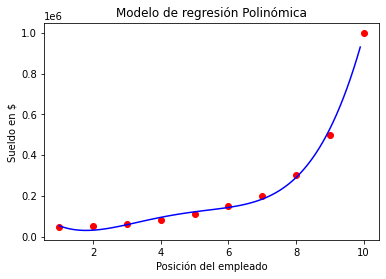

In [ ]:
#Visualización de los resultados del Modelo Polinómico
X_grid = np.arange(min(X), max(X), 0.1) #Suavizar más la gráfica
X_grid = X_grid.reshape(len(X_grid), 1) #Cambiar el orden ahora pasa a ser una matriz
plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Modelo de regresión Polinómica")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo en $")
plt.show()

In [ ]:
#Predicción de nuestros modelos
lin_regression.predict([[6.5]])

array([330378.78787879])

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])